# Taylor series

In mathematics, the Taylor series or Taylor expansion of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point. 

**Import Libraries**

In [1]:
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sympy as sp
import numpy as np

In [3]:
from sympy.plotting import plot

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 8
style.use('ggplot')

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

**Plotting in SymPy**

In [6]:
x=sp.symbols('x')

In [33]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

x**4 - 4*x**3 + 4*x**2 - 2*x + 3

In [34]:
expr.subs(x, 0)

3

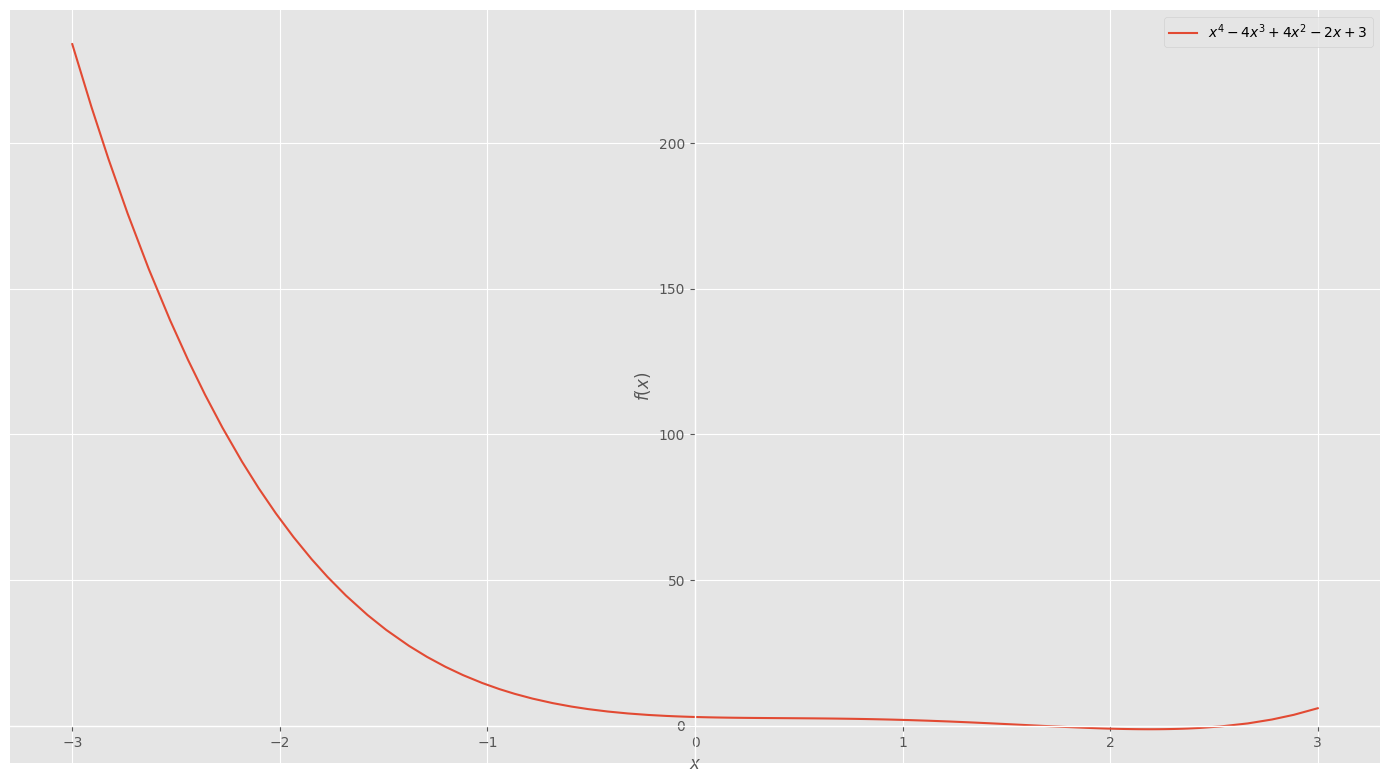

In [8]:
plot(expr,(x,-3,3),legend=True,autoscale=True)

In [35]:
f = sp.sin(x)
f

sin(x)

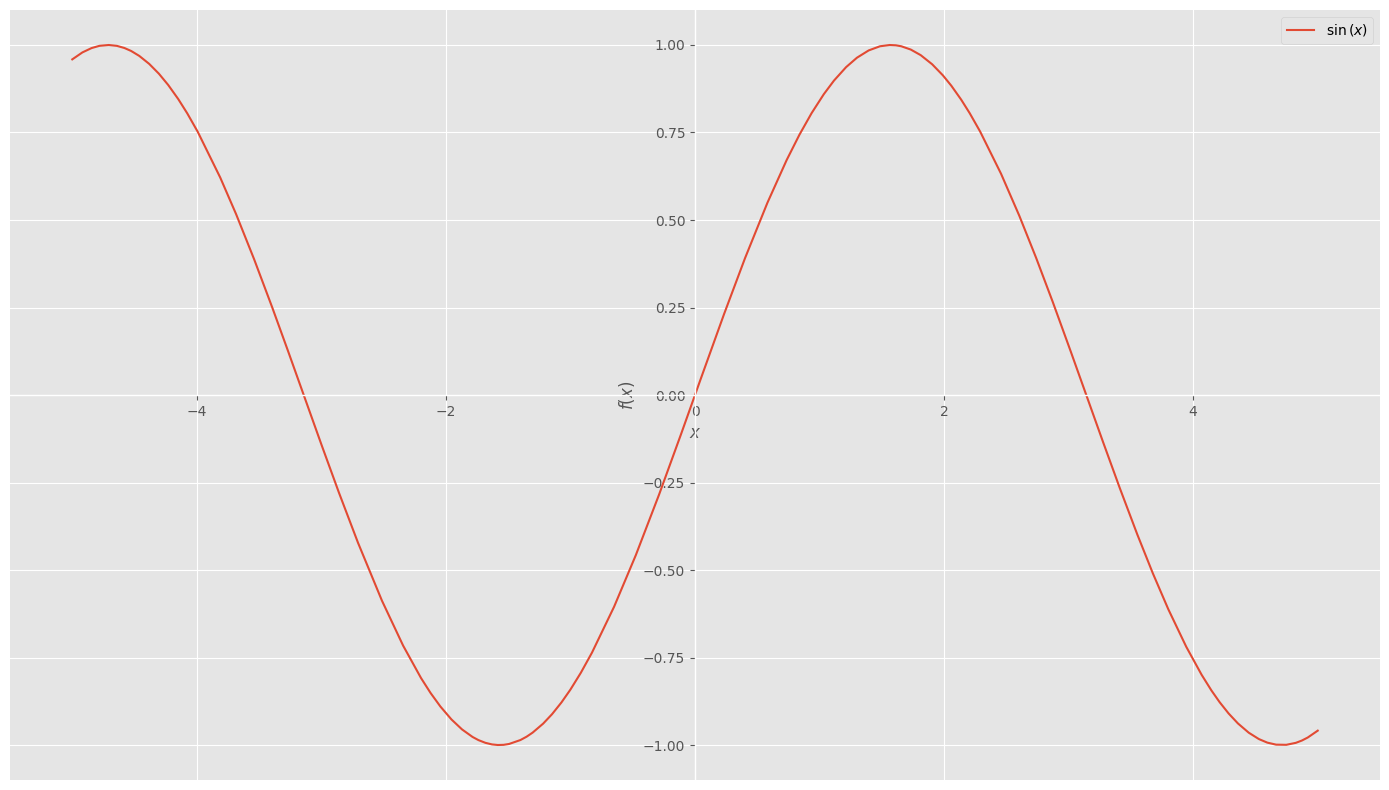

In [11]:
plot(f,(x,-5,5),legend=True)

## Taylor series expansion

${\displaystyle f(x) = \displaystyle f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots =\sum _{n=0}^{\infty }{\frac {f^{(n)}(a)}{n!}}(x-a)^{n}.}$

${\displaystyle f(x,y)} = {\displaystyle f(a,b)+(x-a)f_{x}(a,b)+(y-b)f_{y}(a,b)+{\frac {1}{2!}}{\Big (}(x-a)^{2}f_{xx}(a,b)+2(x-a)(y-b)f_{xy}(a,b)+(y-b)^{2}f_{yy}(a,b){\Big )}}$

In [103]:
f = sp.cos(x)

a=0
n=12
tay_f = sp.series(f,x,a,n)
display(tay_f)

tay_fs=tay_f.removeO()
display(tay_fs)

tay_fo=tay_f.getO()
display(tay_fo)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 - x**10/3628800 + O(x**12)

-x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1

O(x**12)

In [223]:
def function_tay_val(f,a,n,a_1):
    
    tay_f = sp.series(f,x,a,n)
    tay_fs=tay_f.removeO()
    display(f)
    display(tay_fs)

    function_val = f.subs(x,a_1).evalf()
    approx_val   = tay_fs.subs(x, a_1).evalf()
    print()
    print(f"function value at {a_1}:\t {function_val}")
    print()
    print(f"taylor-->expansion order: {n}, around the point:{a} \n\nApprox value at {a_1}:\t {approx_val}")
    print()
    print(f"error:\t\t\t {100*(function_val - approx_val)/function_val}%")    

In [224]:
f= sp.exp(x)

a=0.2
n=3
a1=0.5

function_tay_val(f,a,n,a1)

exp(x)

1.22140275816017*x + 0.610701379080085*(x - 0.2)**2 + 0.977122206528136


function value at 0.5:	 1.64872127070013

taylor-->expansion order: 3, around the point:0.2 

Approx value at 0.5:	 1.64278670972543

error:			 0.359949318308958%


In [225]:
f =sp.sin(x)

def slider(a, n, a_1):
    
    return function_tay_val(f,a,n,a_1)

interactive(slider,
            a  = widgets.IntSlider(min=0, max=5, step=1, value=1),
            n  = widgets.IntSlider(min=1, max=15, step=1, value=1),
            a_1= (0.0, 5.0, 0.001),
           )

interactive(children=(IntSlider(value=1, description='a', max=5), IntSlider(value=1, description='n', max=15, …

## Taylor series visualization

In [226]:
x=sp.symbols('x')

In [227]:
def taylor_approximation(f,a=0, n=3, xpread = 3, yspred = 2):
    
    tay_f = sp.series(f,x,a,n)
    tay_fs=tay_f.removeO()
    on=tay_f.getO()

    ylimit = f.subs(x,a).evalf()
    print(f"function: {f}")
    # print("function")
    # display(f)
    
    print(f"taylor expansion of order {n}: {tay_fs}")
    # print("taylor expansion of order")
    # display(tay_fs)
    
    p1 = plot((f,(x,a-xpread-2,a+xpread+2)),
              (tay_fs,(x,a-xpread,a+xpread)), 
              show=False, 
              ylim = (ylimit-yspred,ylimit+yspred)
              # aspect_ratio=(1.,1.)  
             )
    p1.show()

### Sine function sine(x)

In [228]:
f =sp.sin(x)

def slider(x):
    return taylor_approximation(f,a=1.1,n=x,xpread=5,yspred=3)
    
interact(slider, x=widgets.IntSlider(min=1, max=10, step=1, value=1));   

interactive(children=(IntSlider(value=1, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

In [150]:
# taylor_approximation(f,a=0,n=3,xpread=5)

In [23]:
# taylor_approximation(f,a=0,n=5,xpread=5)

In [24]:
# taylor_approximation(f,a=0,n=7,xpread=5)

In [25]:
# taylor_approximation(f,a=0,n=9,xpread=5)

### Cosine function sine(x)

In [185]:
f =sp.cos(x)

def slider(x):
    return taylor_approximation(f,a=5,n=x,xpread=6,yspred=2)
interact(slider, x=widgets.IntSlider(min=1, max=20, step=1, value=1));   

interactive(children=(IntSlider(value=1, description='x', max=20, min=1), Output()), _dom_classes=('widget-int…

### log x

In [184]:
f = sp.log(x)

def slider(x):
    return taylor_approximation(f,a=1,n=x,xpread=5)
interact(slider, x=widgets.IntSlider(min=1, max=10, step=1, value=1));   

interactive(children=(IntSlider(value=1, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

### Exp function $e^x$

In [182]:
f = sp.exp(x)

def slider(x):
    return taylor_approximation(f,a=1,n=x,yspred=5)
    
interact(slider, x=widgets.IntSlider(min=1, max=30, step=1, value=1));   

interactive(children=(IntSlider(value=1, description='x', max=30, min=1), Output()), _dom_classes=('widget-int…